https://www.tensorflow.org/tutorials/load_data/images?hl=ko

# 라이브러리 임포트

In [39]:
import numpy as np
import os
import PIL
import tensorflow as tf

In [40]:
tf.__version__

'2.10.0'

# 데이터 셋 확인

In [41]:
datasetsPos = r'E:\GithubProjects\MukJumYee\datasets'

In [42]:
import pathlib

dataDir = pathlib.Path(datasetsPos)
dataDir

WindowsPath('E:/GithubProjects/MukJumYee/datasets')

In [43]:
imageCount = len(list(dataDir.glob('*/*.png')))
imageCount

103400

# keras utils 로 데이터 로드

In [44]:
BATCH_SIZE = 32
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64

In [45]:
trainDataset = tf.keras.utils.image_dataset_from_directory(
	dataDir,
	validation_split=0.2,
	subset='training',
	seed=123,
	image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
	batch_size=BATCH_SIZE,
    color_mode='grayscale',
)

Found 103400 files belonging to 2350 classes.
Using 82720 files for training.


In [46]:
validationDataset = tf.keras.utils.image_dataset_from_directory(
	dataDir,
	validation_split=0.2,
	subset='validation',
	seed=123,
	image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
	batch_size=BATCH_SIZE,
    color_mode='grayscale',
)

Found 103400 files belonging to 2350 classes.
Using 20680 files for validation.


In [47]:
classNames = trainDataset.class_names
len(classNames)

2350

# matplotlib 폰트 한글 설정

In [48]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
fontPath = "./fonts/batang.ttc"
fontName = font_manager.FontProperties(fname=fontPath).get_name()
matplotlib.rc('font', family=fontName)

# 이미지 미리보기

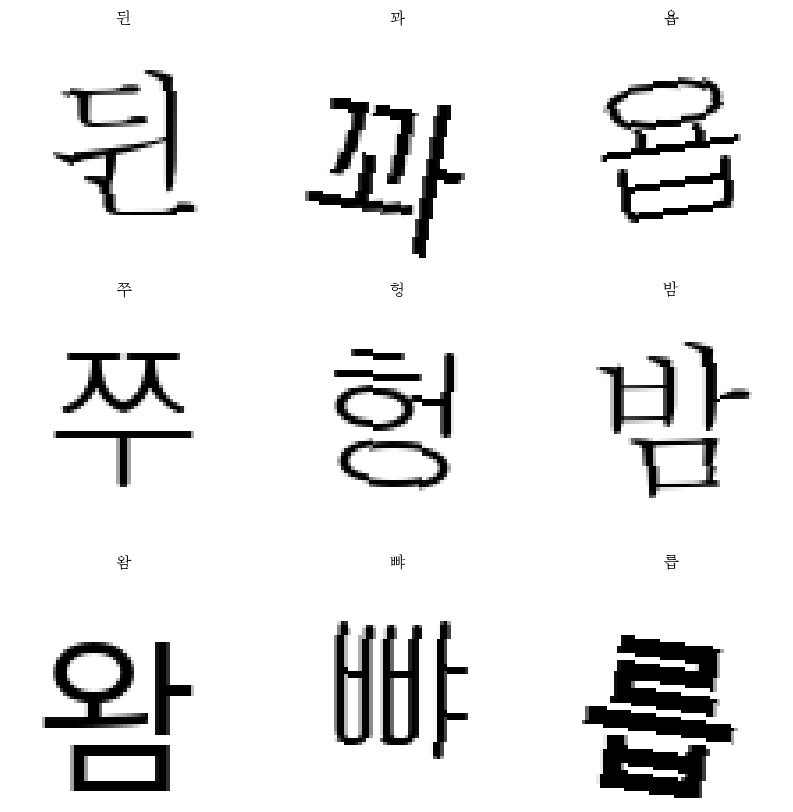

In [51]:
plt.figure(figsize=(10, 10))
for images, labels in trainDataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(classNames[labels[i]])
    plt.axis("off")

In [50]:
for imageBatch, labelBatch in trainDataset:
	print(imageBatch.shape)
	print(labelBatch.shape)
	break

(32, 64, 64, 1)
(32,)


# 더 나은 성능

https://wh00300.tistory.com/90

- 데이터셋.cache() : 첫 epoch 일 때, 이미지를 로드하고 메모리에 유지한다.  
- 데이터셋.prefetch() : 훈련에 필요한 데이터를 미리 가져온다.

In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = trainDataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validationDataset.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
classNum = len(classNames)
classNum

2350

In [54]:
model = tf.keras.Sequential([
	tf.keras.layers.Rescaling(1./255),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(classNum)
])

https://han-py.tistory.com/266  
https://hwiyong.tistory.com/335

from_logits?
- logit 함수는 logistic 과 probit 의 합성어, sigmoid 함수와 역함수 관계(y=x 그래프를 기준으로 대칭, y->x, x->y)
- softmax 함수를 거치지 않았다면, from_logits = True 로 사용한다
- softmax 함수를 거쳤다면, from_logits = False 로 사용한다

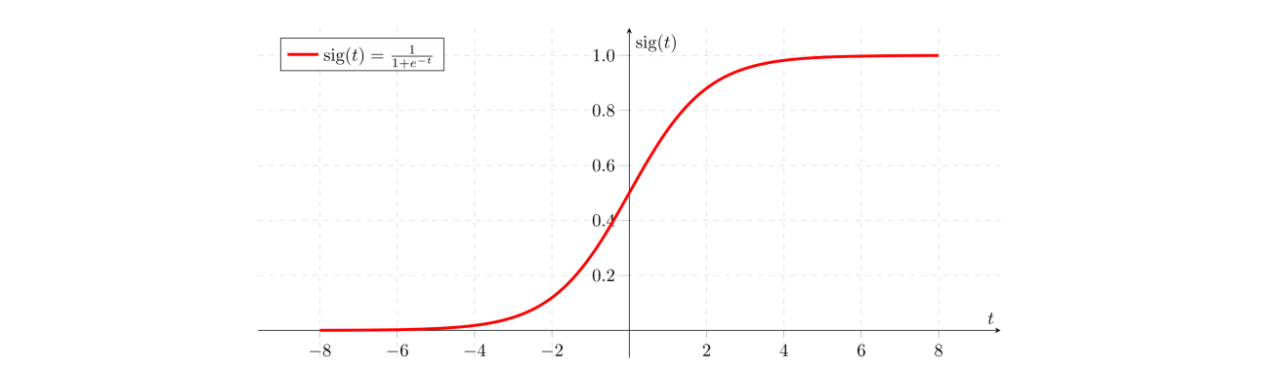
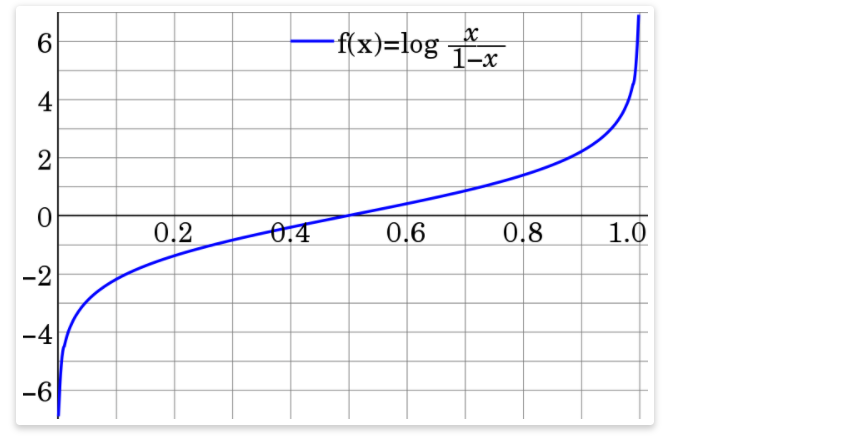

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [57]:
model.fit(
    trainDataset,
    validation_data=validationDataset,
    epochs=10
)

Epoch 1/10
2585/2585 [==============================] - 227s 88ms/step - loss: 7.7650 - accuracy: 3.0222e-04 - val_loss: 7.7748 - val_accuracy: 9.6712e-05
Epoch 2/10
2585/2585 [==============================] - 224s 87ms/step - loss: 7.7643 - accuracy: 2.2969e-04 - val_loss: 7.7781 - val_accuracy: 9.6712e-05
Epoch 3/10
2585/2585 [==============================] - 261s 101ms/step - loss: 7.7638 - accuracy: 3.0222e-04 - val_loss: 7.7806 - val_accuracy: 9.6712e-05
Epoch 4/10
2585/2585 [==============================] - 241s 93ms/step - loss: 7.7636 - accuracy: 3.3849e-04 - val_loss: 7.7826 - val_accuracy: 9.6712e-05
Epoch 5/10
2585/2585 [==============================] - 232s 90ms/step - loss: 7.7636 - accuracy: 3.5058e-04 - val_loss: 7.7840 - val_accuracy: 9.6712e-05
Epoch 6/10
2585/2585 [==============================] - 243s 94ms/step - loss: 7.7635 - accuracy: 3.2640e-04 - val_loss: 7.7851 - val_accuracy: 9.6712e-05
Epoch 7/10
 959/2585 [==========>...................] - ETA: 2:37 - l

KeyboardInterrupt: 

너무 느려서 약 5.5배 빠른 colab 으로 대신 학습